In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [142]:
df=pd.read_csv("titanic_dataset.csv",index_col='PassengerId')

In [143]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
df.shape

(891, 11)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [146]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
#Checking missing values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [148]:
#Filling 'Age' and 'Embarked' columns with median and mode.
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [149]:
#Dropping 'Cabin' column
df.drop(['Cabin'],axis=1,inplace=True)

In [150]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Missing values are handled

In [151]:
#Handling Categorical features
df['Sex']=df['Sex'].replace(['male','female'],[0,1])
df['Embarked']=df['Embarked'].replace(['S','C','Q'],[0,1,2])

In [152]:
#Name and Ticket columns are not relevant. So drop it
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


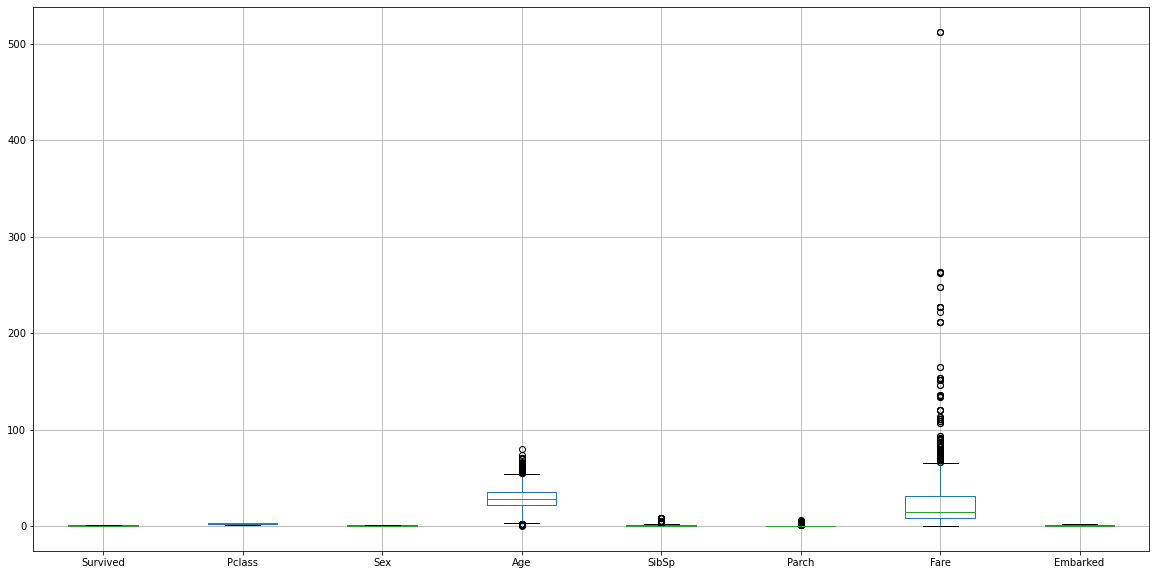

In [154]:
#Handling Outliers
box=df.select_dtypes(include=['int64','float64','int32'])
box.boxplot(figsize=(20,10))
plt.show()

In [155]:
for i in ['Age', 'SibSp', 'Parch', 'Fare']:
         Q1=np.percentile(df[i],25,interpolation='midpoint')
         Q2=np.percentile(df[i],50,interpolation='midpoint')
         Q3=np.percentile(df[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
         IQR=Q3-Q1
         low=Q1-1.5*IQR
         up=Q3+1.5*IQR

         #Identifying outlier values
         outliers=[]
         for x in df[i]:
             if (x>up)or(x<low):
               outliers.append(x)
         ind=(df[i]>up)
         i=df.loc[ind].index
         df.drop(i,inplace=True)

22.0 28.0 35.0
0.0 0.0 1.0
0.0 0.0 0.0
7.8542 10.0083 26.0


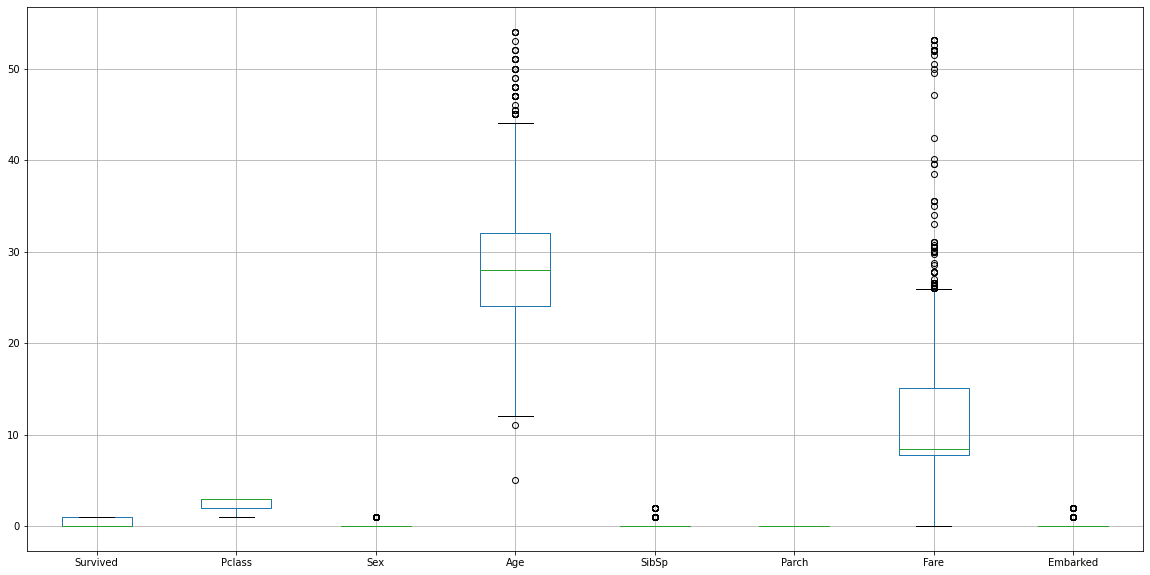

In [156]:
box=df.select_dtypes(include=['int64','float64','int32'])
box.boxplot(figsize=(20,10))
plt.show()

Outliers are removed

In [157]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [158]:
#Splitting dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [159]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [160]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,561.000000,561.000000,561.000000,561.000000,561.0,561.000000,561.000000
mean,2.520499,0.247772,29.171123,0.190731,0.0,13.727918,0.363636
std,0.717155,0.432104,8.463058,0.440357,0.0,10.560514,0.678520
min,1.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.0,7.775000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.0,8.458300,0.000000
75%,3.000000,0.000000,32.000000,0.000000,0.0,15.050000,0.000000
max,3.000000,1.000000,54.000000,2.000000,0.0,53.100000,2.000000


In [161]:
#Fitting Gaussian Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Measuring Efficiency of Gaussian Naive Bayes\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Measuring Efficiency of Gaussian Naive Bayes

Confusion Matrix is :
 [[102  19]
 [ 12  36]]
Accuracy is 0.8165680473372781
Precision is 0.7746411483253588
Recall is 0.796487603305785
F1 score is 0.7835571162982855


In [163]:
# Fitting Bernoulli Naive Bayes to training set
from sklearn.naive_bayes import BernoulliNB
bb = BernoulliNB()
bb.fit(X_train,y_train)
y_pred = bb.predict(X_test)

In [164]:
print("Measuring Efficiency of Bernoulli Naive Bayes\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Measuring Efficiency of Bernoulli Naive Bayes

Confusion Matrix is :
 [[111  10]
 [ 21  27]]
Accuracy is 0.8165680473372781
Precision is 0.7853194103194103
Recall is 0.7399276859504132
F1 score is 0.7563822366891421
